In [1]:
# Choose datasets that have less 50K instances and 20 features, to keep training times reasonable
# Choose a multivariate classification dataset
# Avoid datasets with missing  data. Do not need imputation
# Avoid imbalanced dataset to keep the metric to accuracy or f1


In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
from itertools import combinations, product

import matplotlib.pyplot as plt 

from sklearn.metrics import matthews_corrcoef
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.model_selection import cross_validate

from ucimlrepo import fetch_ucirepo 

# from utils import plot_decision_tree, plot_decision_surface, plot_feature_importance, plot_partial_dependence
from utils import get_data, get_df_details, plot_distrb

sns.set(rc={'figure.figsize':(11.7,8.27)})

In [3]:
X, y, metadata, variables = get_data('wine_quality')

In [4]:
X.shape

(6497, 11)

In [5]:
X_summary = get_df_details(X)
X_summary.merge(variables.set_index('name'), how='outer', left_index=True, right_index=True)

,count,mean,std,min,25%,50%,75%,max,nunique,n_nulls,dtype,role,type,demographic,description,units,missing_values
alcohol,6497.0,10.491801,1.192712,8.00000,9.50000,10.30000,11.30000,14.90000,111.0,0.0,float64,Feature,Continuous,None,None,None,no
chlorides,6497.0,0.056034,0.035034,0.00900,0.03800,0.04700,0.06500,0.61100,214.0,0.0,float64,Feature,Continuous,None,None,None,no
citric_acid,6497.0,0.318633,0.145318,0.00000,0.25000,0.31000,0.39000,1.66000,89.0,0.0,float64,Feature,Continuous,None,None,None,no
color,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other,Categorical,None,red or white,None,no
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898,998.0,0.0,float64,Feature,Continuous,None,None,None,no
fixed_acidity,6497.0,7.215307,1.296434,3.80000,6.40000,7.00000,7.70000,15.90000,106.0,0.0,float64,Feature,Continuous,None,None,None,no
free_sulfur_dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000,135.0,0.0,float64,Feature,Continuous,None,None,None,no
pH,6497.0,3.218501,0.160787,2.72000,3.11000,3.21000,3.32000,4.01000,108.0,0.0,float64,Feature,Continuous,None,None,None,no
quality,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Target,Integer,None,score between 0 and 10,None,no
residual_sugar,6497.0,5.443235,4.757804,0.60000,1.80000,3.00000,8.10000,65.80000,316.0,0.0,float64,Feature,Continuous,None,None,None,no


In [6]:
idx = variables['type'].isin(['Integer', 'Continuous'])
int_cols = variables.loc[idx, 'name']
int_cols = int_cols.loc[~int_cols.isin(y.columns.tolist())]
int_cols

0            fixed_acidity
1         volatile_acidity
2              citric_acid
3           residual_sugar
4                chlorides
5      free_sulfur_dioxide
6     total_sulfur_dioxide
7                  density
8                       pH
9                sulphates
10                 alcohol
Name: name, dtype: object

In [7]:
# THERE IS NO COLOR COLUMN IN THE ACTUAL DATASET

idx = variables['type'].isin(['Categorical', 'Binary'])
cat_cols = variables.loc[idx, 'name']
cat_cols = cat_cols.loc[~cat_cols.isin(y.columns)]
cat_cols


12    color
Name: name, dtype: object

<Axes: title={'center': 'Wine Quality - 11 features, 6K+ rows'}, xlabel='Class', ylabel='%'>

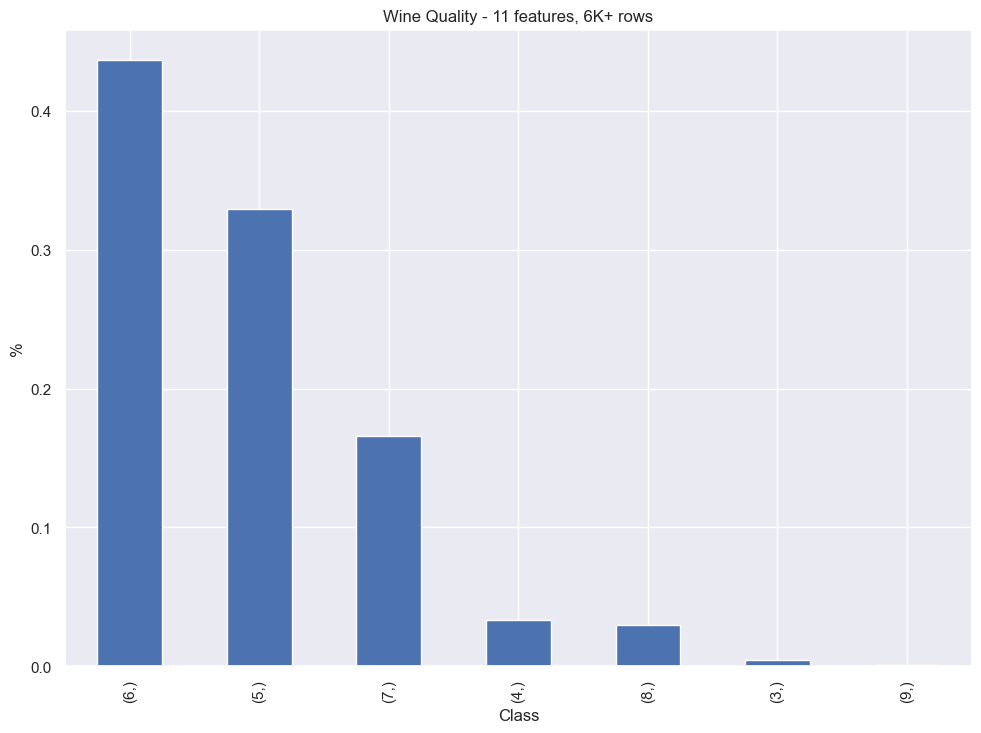

In [8]:
y.value_counts(normalize=True).plot(kind='bar', title='Wine Quality - 11 features, 6K+ rows', xlabel='Class', ylabel='%')

# EDA - on the FULL data set
1. For the binary/Categorical value to a % plot of distribution
2. For the continuous/integer data - do a violin plot distribution
3. Do a correlation plot of the numeric series

In [15]:

X_eda = X.copy()

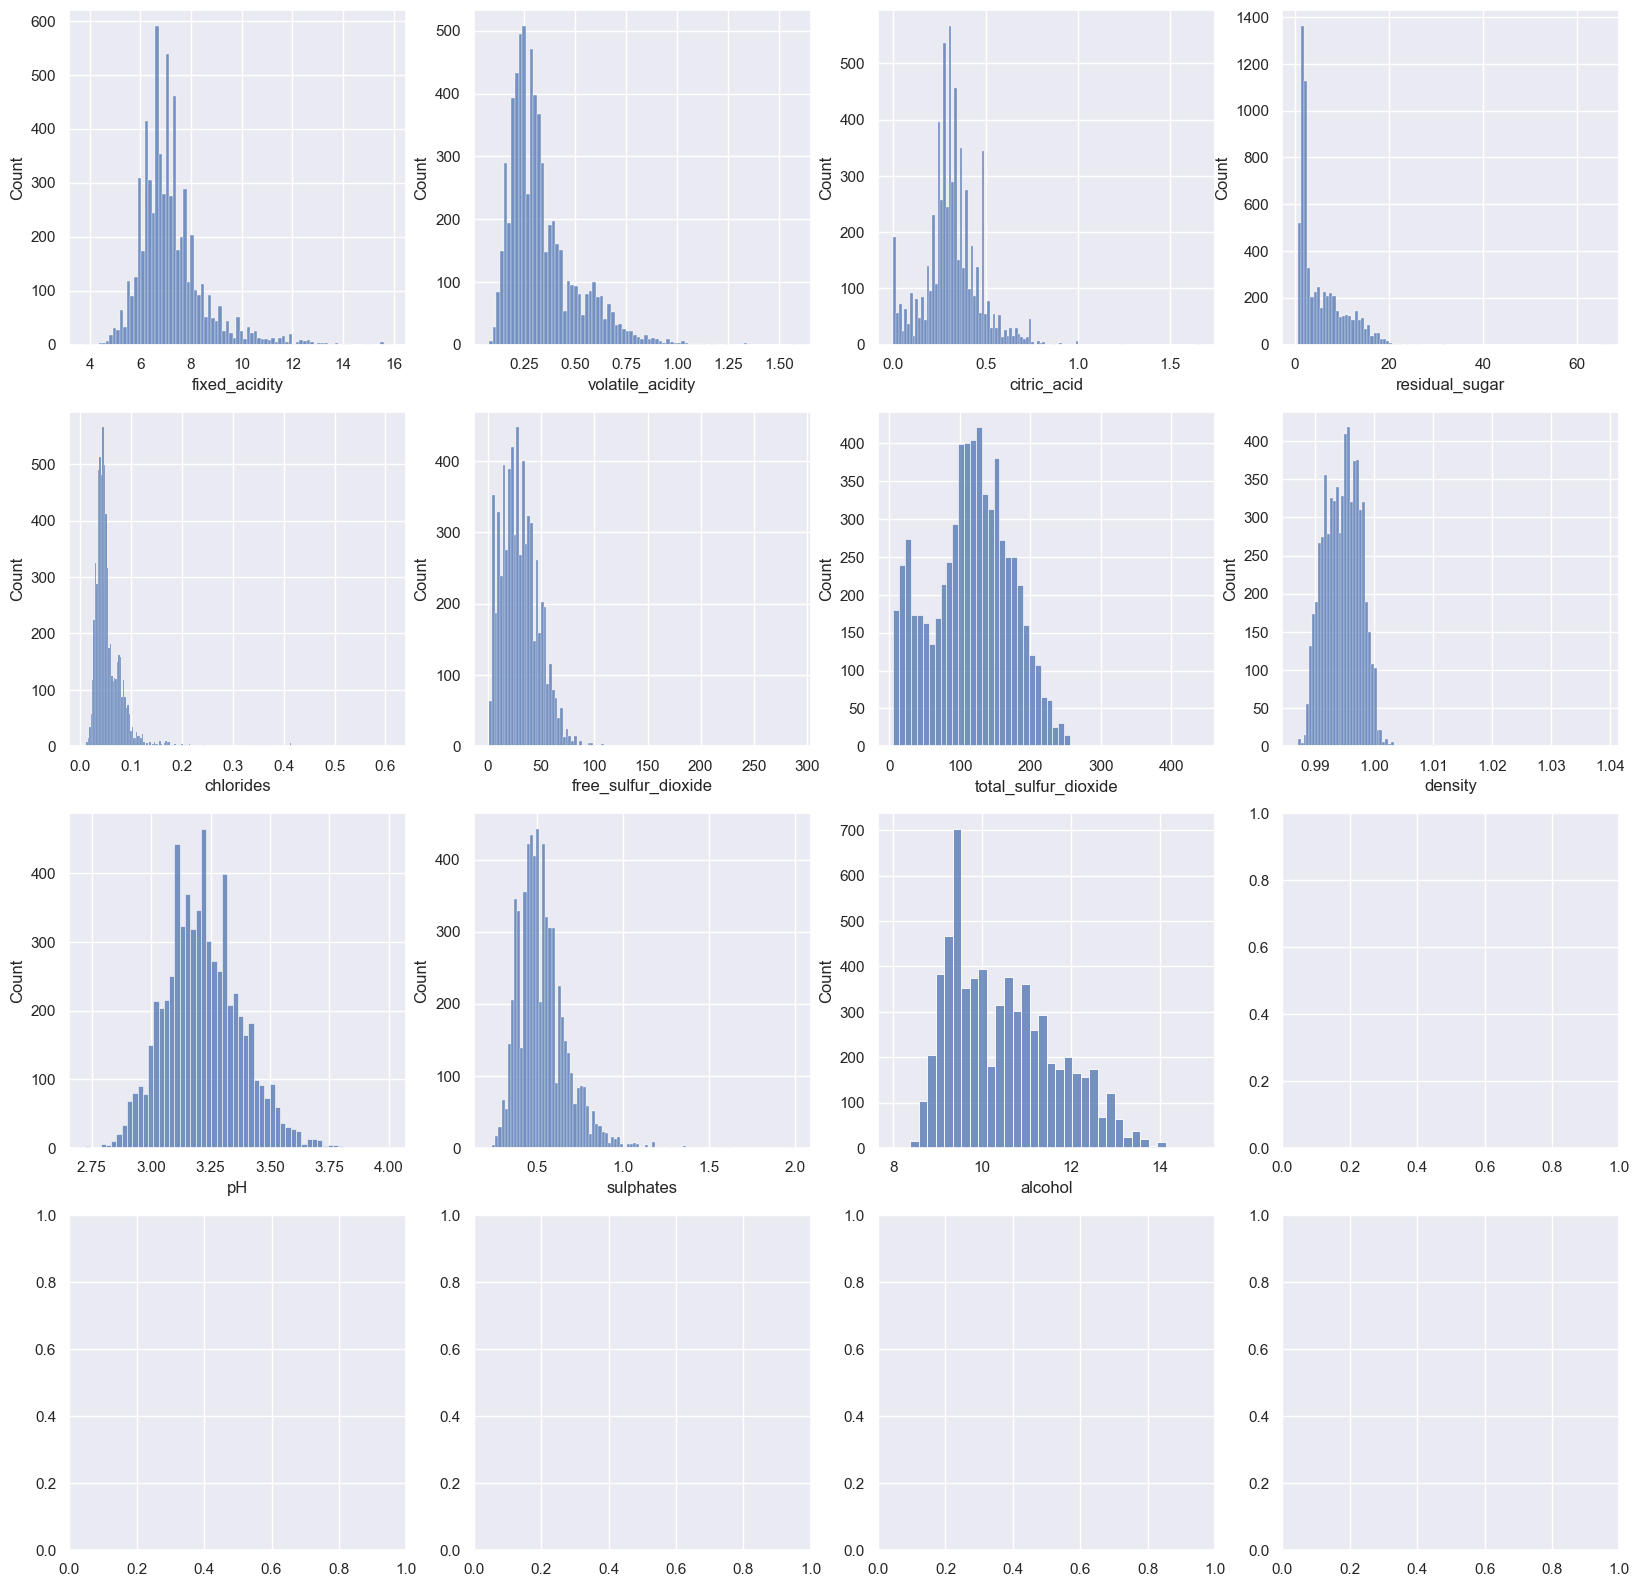

In [16]:
plot_distrb(X_eda)

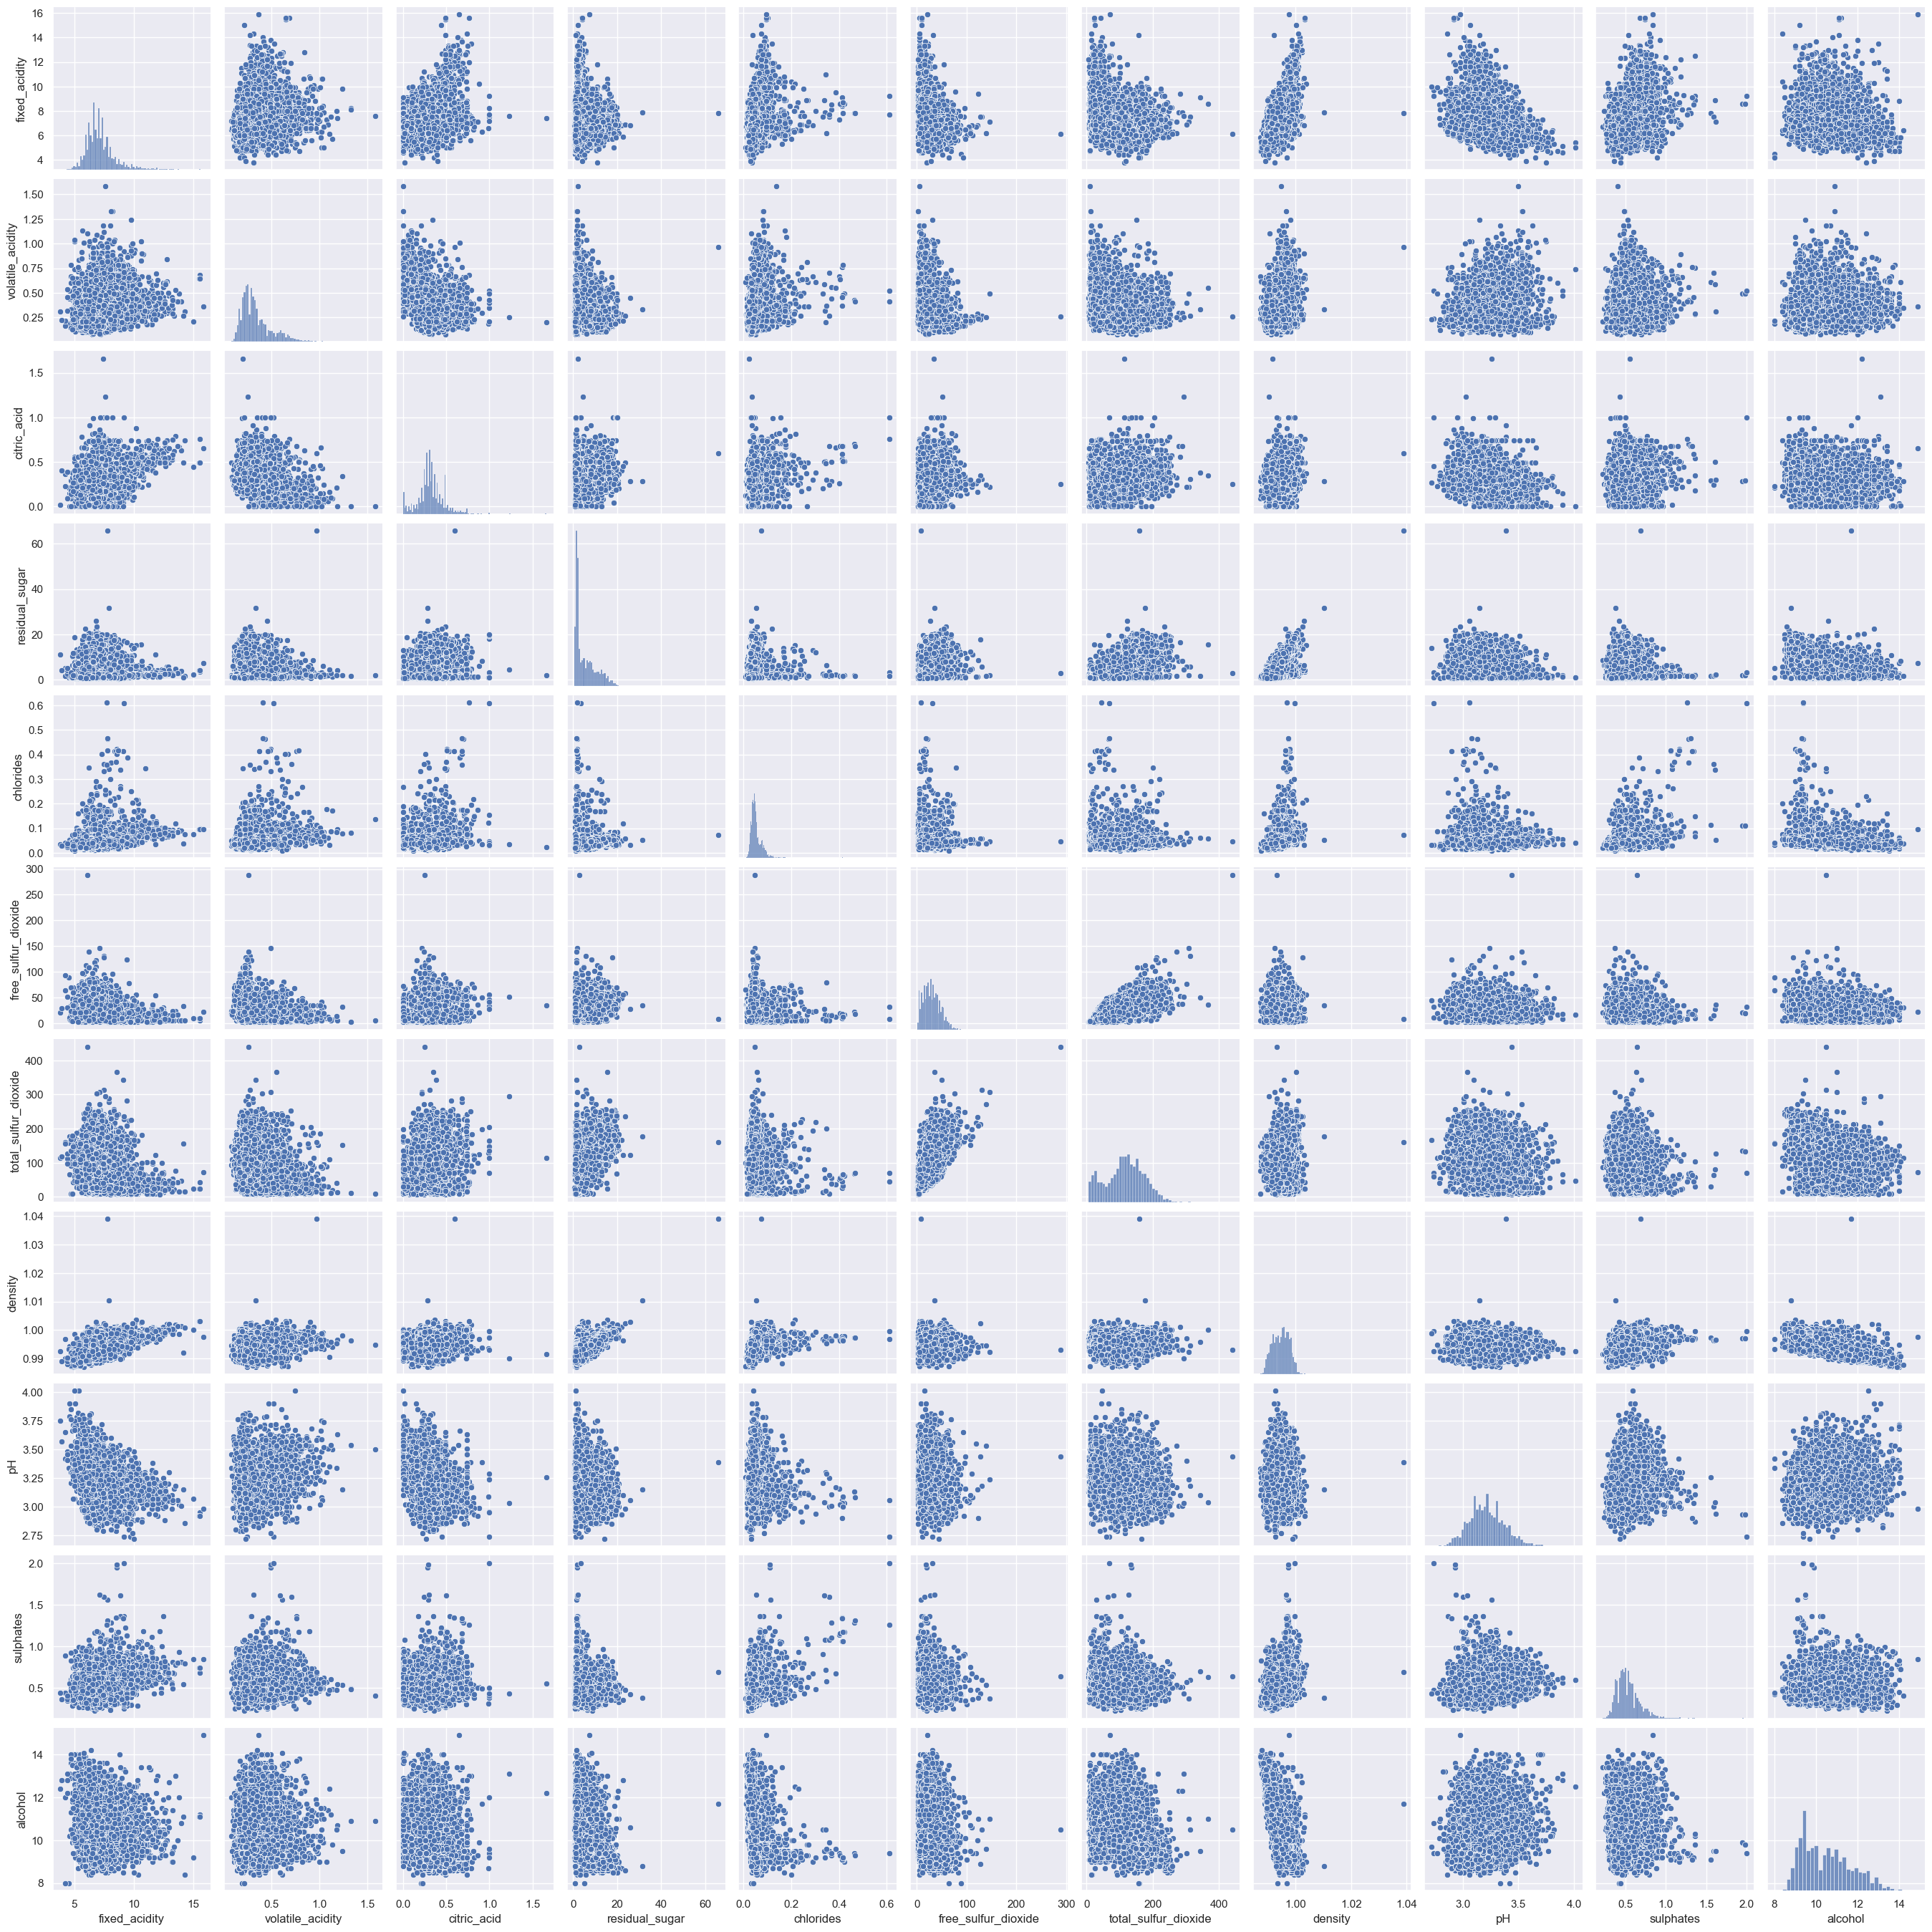

In [17]:
sns.pairplot(X_eda, )

<Axes: >

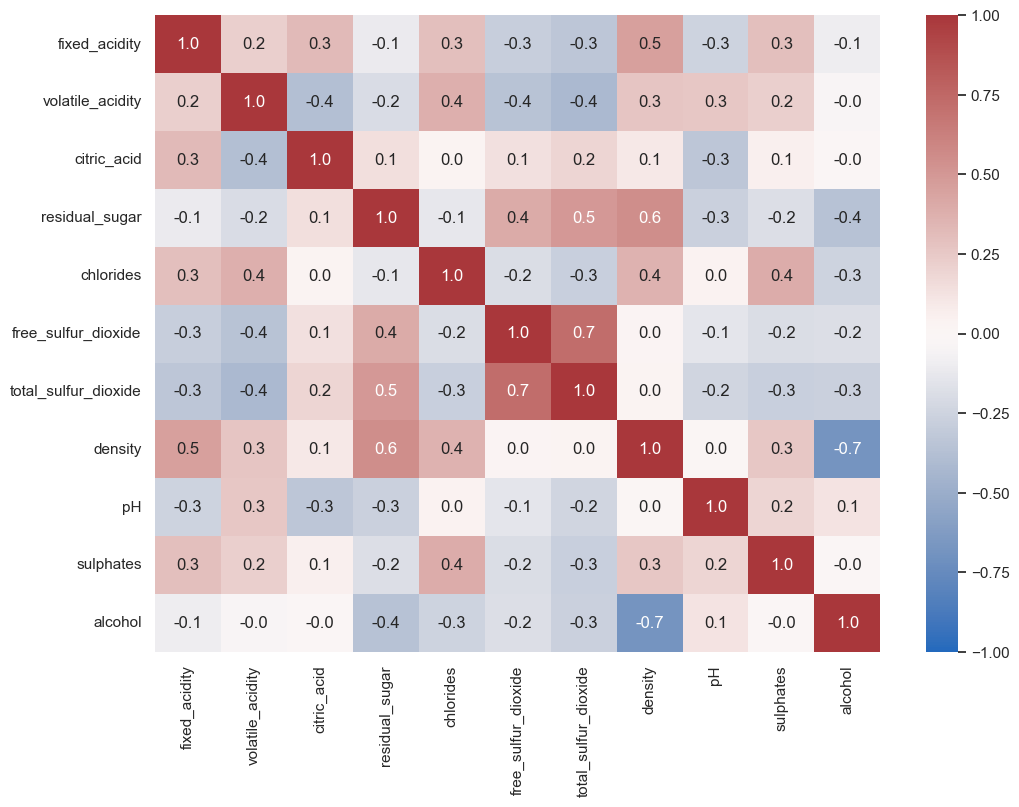

In [18]:
sns.heatmap(X_eda[int_cols].corr(),annot=True, fmt=".1f", vmin=-1, vmax = 1, cmap='vlag')